### EDA on kaggle dataset of chairs

# Importing Data into DF and viewing images

In [1]:
import pandas as pd 
import numpy as np 


In [2]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

chair_folder = 'train/chair'

# Function to read and display images
def display_images(folder_path):
    images = os.listdir(folder_path)
    image_list = []
    
    for image_name in images:
        if image_name.endswith('.jpg'):
            image_path = os.path.join(folder_path, image_name)
            
            # Read image using PIL (Python Imaging Library)
            image = Image.open(image_path)
            
            # Convert image to numpy array
            image_data = plt.imread(image_path)
            
            # Append image and file name to a list
            image_list.append({'Image': image_data, 'File Name': image_name})
    
    # Create a DataFrame from the image data
    df_images = pd.DataFrame(image_list)
    
    return df_images

# Create DataFrame with images
df_images = display_images(chair_folder)

In [4]:
df_images.head(5)

,Image,File Name
0,"[[[189, 187, 188], [189, 187, 188], [189, 187,...",img1578.jpg
1,"[[[126, 89, 73], [75, 39, 23], [75, 43, 30], [...",img430.jpg
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",img587.jpg
3,"[[[68, 71, 64], [20, 23, 16], [26, 29, 22], [1...",img1478.jpg
4,"[[[60, 61, 63], [54, 55, 57], [59, 60, 62], [8...",img30.jpg


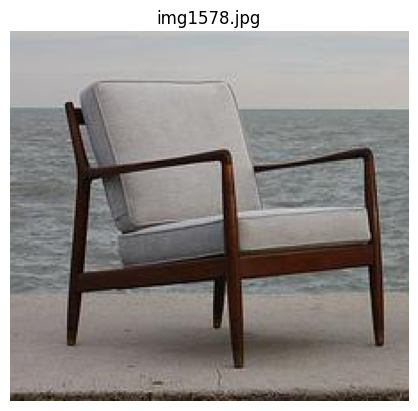

In [34]:

# Display the first image
first_image = df_images.iloc[0]['Image']
first_image_name = df_images.iloc[0]['File Name']

plt.imshow(first_image)
plt.title(first_image_name)
plt.axis('off')
plt.show()


## Resolution of images

In [6]:
# Function to get image resolution
def get_image_resolution(image_array):
    if len(image_array.shape) == 3:  # Check if it's a color image
        height, width, _ = image_array.shape
    else:  # Grayscale or single-channel image
        height, width = image_array.shape
    return (width, height)

# Apply the function to get resolution for the first image
first_image_resolution = get_image_resolution(df_images['Image'][0])

# Print the resolution of the first image
print("Resolution of the first image:", first_image_resolution)


Resolution of the first image: (224, 208)


## Each Image has a different resolution, all pictures must be converted to 250 x 250 pixels 

In [7]:
# # Preprocessing to change resolution of dataset into 100 x 100 resolution and normalize -- Greyscale conversion 

# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path

# # Function to resize and normalize an image
# def preprocess_image(image_path, target_size=(250, 250)):
#     # Open the image
#     with Image.open(image_path) as img:
#         # Resize the image to the target size
#         resized_img = img.resize(target_size)
#         # Convert the image to grayscale and convert to numpy array
#         resized_array = np.array(resized_img.convert('RGB'))
#         # Normalize pixel values to be between 0 and 1
#         normalized_array = resized_array / 255.0
#     return normalized_array

# # Path to the folder containing your images
# images_folder = Path('train/chair')

# # List to store processed images
# processed_images = []

# # Loop through each image file in the folder
# for image_file in images_folder.glob("*.jpg"):
#     processed_image = preprocess_image(image_file)
#     processed_images.append(processed_image)

# # Convert the list of images to a numpy array
# processed_images_array = np.array(processed_images)

In [22]:
# # Check the shape of the processed images array
# print("Processed Images Shape:", processed_images_array.shape)

# # Display one of the processed images
# plt.imshow(processed_images_array[1510], cmap='gray')
# plt.title("Processed Image")
# plt.axis('off')
# plt.show()

In [11]:
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path

def preprocess_image(image_path, target_size=(250, 250), fill_color=(255, 255, 255)):
    """
    Preprocess an image by resizing it to the target size while maintaining aspect ratio.
    The image will be resized to fit within the target size and padded with fill color if necessary.
    
    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Target size to resize the image to.
        fill_color (tuple): RGB color tuple for fill color when padding.
    
    Returns:
        numpy.ndarray: Processed image array.
    """
    image = Image.open(image_path)
    width, height = image.size
    target_width, target_height = target_size
    
    # Calculate aspect ratios
    aspect_ratio = width / height
    target_aspect_ratio = target_width / target_height
    
    # Resize image to fit within the target size
    if aspect_ratio > target_aspect_ratio:
        # Fit width to target width
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        # Fit height to target height
        new_height = target_height
        new_width = int(target_height * aspect_ratio)
    
    # Resize image
    resized_img = image.resize((new_width, new_height))
    
    # Create new image with target size and fill color
    padded_img = Image.new('RGB', target_size, fill_color)
    
    # Paste resized image onto the new image
    left = (target_width - new_width) // 2
    top = (target_height - new_height) // 2
    padded_img.paste(resized_img, (left, top))
    
    # Convert to numpy array
    resized_array = np.array(padded_img)
    
    return resized_array

# Path to the folder containing images
images_folder = Path('train/chair')

# List to store processed images
processed_images = []

# Iterate through images in the folder
for image_file in images_folder.glob("*.jpg"):
    # Preprocess the image
    processed_image = preprocess_image(image_file)
    
    # Append the processed image to the list
    processed_images.append(processed_image)

# Convert the list of images to a numpy array
processed_images_array = np.array(processed_images)

# Check the shape of the processed images array
print("Processed Images Shape:", processed_images_array.shape)

Processed Images Shape: (1627, 250, 250, 3)


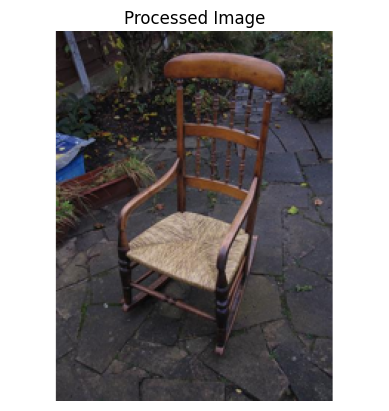

In [33]:
# Display one of the processed images
plt.imshow(processed_images_array[250], cmap='gray')
plt.title("Processed Image")
plt.axis('off')
plt.show()

In [9]:
# Converts the original images to 250 x 250 and stores in folder in local. 


# from PIL import Image
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# import os

# # Function to resize and normalize an image
# def preprocess_image(image_path, target_size=(250, 250)):
#     # Open the image
#     with Image.open(image_path) as img:
#         # Resize the image to the target size
#         resized_img = img.resize(target_size)
#         # Convert the image to grayscale and convert to numpy array
#         resized_array = np.array(resized_img.convert('RGB'))
#         # Normalize pixel values to be between 0 and 1
#         normalized_array = resized_array / 255.0
#     return normalized_array

# # Path to the folder containing your images
# images_folder = Path('train/chair')

# # Path to the folder where processed images will be saved
# processed_folder = Path('processed_images')

# # Create the processed folder if it doesn't exist
# os.makedirs(processed_folder, exist_ok=True)

# # Loop through each image file in the folder
# for image_file in images_folder.glob("*.jpg"):
#     # Preprocess the image
#     processed_image = preprocess_image(image_file)
    
#     # Save the processed image as a JPEG file in the processed folder
#     image_name = image_file.stem  # Get the image file name without extension
#     processed_image_path = processed_folder / (image_name + '_processed.jpg')
    
#     # Save the image
#     Image.fromarray((processed_image * 255).astype(np.uint8)).save(processed_image_path)

#     # Print progress
#     print(f"Processed and saved: {processed_image_path}")

# # Confirm completion
# print("All images processed and saved.")

# # Display one of the processed images
# plt.imshow(processed_image, cmap='gray')
# plt.title("Processed Image")
# plt.axis('off')
# plt.show()

In [36]:
# Converts the original images to 250 x 250, keeps aspect the same and stores in folder in local. 
import numpy as np
import pandas as pd
from PIL import Image
from pathlib import Path

def preprocess_image(image_path, target_size=(250, 250), fill_color=(255, 255, 255)):
    """
    Preprocess an image by resizing it to the target size while maintaining aspect ratio.
    The image will be resized to fit within the target size and padded with fill color if necessary.
    
    Args:
        image_path (str): Path to the image file.
        target_size (tuple): Target size to resize the image to.
        fill_color (tuple): RGB color tuple for fill color when padding.
    
    Returns:
        numpy.ndarray: Processed image array.
    """
    image = Image.open(image_path)
    width, height = image.size
    target_width, target_height = target_size
    
    # Calculate aspect ratios
    aspect_ratio = width / height
    target_aspect_ratio = target_width / target_height
    
    # Resize image to fit within the target size
    if aspect_ratio > target_aspect_ratio:
        # Fit width to target width
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:
        # Fit height to target height
        new_height = target_height
        new_width = int(target_height * aspect_ratio)
    
    # Resize image
    resized_img = image.resize((new_width, new_height))
    
    # Create new image with target size and fill color
    padded_img = Image.new('RGB', target_size, fill_color)
    
    # Paste resized image onto the new image
    left = (target_width - new_width) // 2
    top = (target_height - new_height) // 2
    padded_img.paste(resized_img, (left, top))
    
    # Convert to numpy array
    resized_array = np.array(padded_img)
    
    return resized_array

# Path to the folder containing images
images_folder = Path('train/chair')

# Create a new folder for processed images
output_folder = Path("new_processed_images")
output_folder.mkdir(parents=True, exist_ok=True)

# Iterate through images in the folder
for image_file in images_folder.glob("*.jpg"):
    # Preprocess the image
    processed_image = preprocess_image(image_file)
    
    # Save the processed image
    image_name = image_file.stem + "_processed.jpg"
    output_path = output_folder / image_name
    Image.fromarray(processed_image).save(output_path)

print("Processed images saved in:", output_folder)


Processed images saved in: new_processed_images
